In [2]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
X=df.iloc[:,0:1]

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
Y=df.iloc[:,-1:]

In [8]:
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [10]:
X_train

,cgpa
183,7.28
182,5.88
126,5.91
108,7.76
63,9.16
...,...
184,7.88
133,6.05
23,6.19
163,8.93


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [12]:
lr.fit(X_train,Y_train)

LinearRegression()

In [13]:
X_train.shape

(160, 1)

In [14]:
Y_train.shape

(160, 1)

In [15]:
X_test

,cgpa
143,4.85
181,8.22
148,7.57
127,6.78
58,6.92
115,8.35
80,7.63
67,6.51
74,6.85
153,7.94


In [16]:
Y_test

,package
143,1.54
181,3.89
148,3.40
127,3.11
58,3.09
115,4.21
80,3.44
67,2.89
74,3.44
153,3.99


In [17]:
y_pred=lr.predict(X_test.iloc[[4]])

In [27]:
y_pred=lr.predict(X_test)

In [28]:
y_pred

array([[1.77994099],
       [3.67791697],
       [3.31183852],
       [2.8669124 ],
       [2.94576007],
       [3.75113266],
       [3.34563038],
       [2.71484904],
       [2.90633623],
       [3.52022164],
       [4.04399542],
       [3.21609492],
       [3.23299085],
       [3.89193207],
       [2.47830604],
       [2.10096364],
       [2.33750664],
       [2.79932868],
       [3.37942223],
       [4.08341926],
       [4.13973902],
       [2.33187466],
       [2.07843573],
       [2.91760018],
       [2.95139204],
       [1.4476544 ],
       [3.06966354],
       [2.5346258 ],
       [3.15977516],
       [3.50332571],
       [1.99395609],
       [2.49520197],
       [3.09219145],
       [3.40195014],
       [2.3938264 ],
       [3.15977516],
       [3.61596523],
       [3.43011002],
       [2.55152173],
       [2.85001647]])

<Axes: xlabel='cgpa', ylabel='package'>

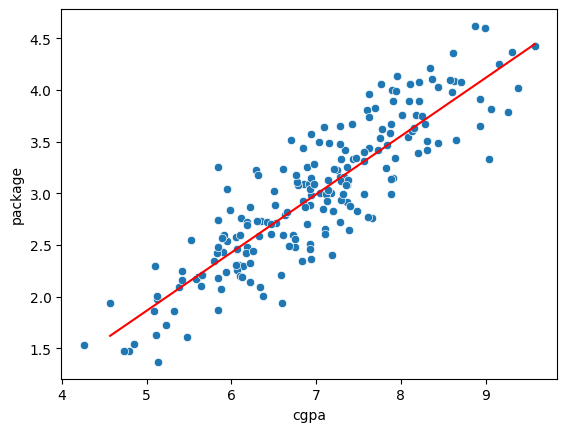

In [25]:
sns.scatterplot(x=df['cgpa'],y=df['package'])
sns.lineplot(x=X_train['cgpa'],y=lr.predict(X_train).flatten(),color='red')


In [20]:
lr.coef_

array([[0.56319762]])

In [21]:
lr.intercept_

array([-0.95156747])

In [29]:
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)

0.7605199551536233

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,Y,cv=6,scoring='r2').mean()

np.float64(0.7600058720083321)